In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
# Carregando csv
yeast_data = pd.read_csv("yeast.csv") 

In [18]:
# Sneak peek no dataset
yeast_data.head() 

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [19]:
yeast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [20]:
# Verificando nulos
yeast_data.isna().sum() 

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [21]:
yeast_data.shape

(1484, 9)

In [22]:
# adequando X e y (features e target)

X = yeast_data.drop(['name'], axis=1) 
y = yeast_data.name



<Axes: >

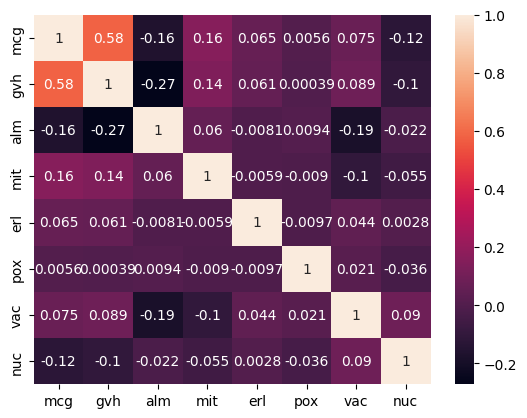

In [23]:
sns.heatmap(X.corr(), annot=True)

In [24]:
# Encodando variável target
le = LabelEncoder()
y_encoded=le.fit_transform(y)

In [25]:
yeast_data.name.value_counts()

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

In [29]:
reg_log = LogisticRegression(multi_class='multinomial')

xtr, xts, ytr, yts = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

reg_log.fit(xtr, ytr)

y_pred = reg_log.predict(xts)

c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(yts, y_pred)

0.5757575757575758

In [31]:
from sklearn.metrics import classification_report


print(classification_report(y_pred, yts))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       134
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.67      0.75      0.71         8
           4       0.00      0.00      0.00         0
           5       0.75      0.77      0.76        31
           6       0.57      0.52      0.54        54
           7       0.52      0.65      0.58        69
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         0

    accuracy                           0.58       297
   macro avg       0.35      0.42      0.36       297
weighted avg       0.65      0.58      0.60       297



c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le